In [2]:
#pip install prophet

In [3]:
import pandas as pd
import os

##PATH_CSV = ''

df_sales = pd.read_csv('sales_train.csv')
df_items = pd.read_csv('items.csv')
df_resturants = pd.read_csv('resturants.csv')

df_sales.date = pd.to_datetime(df_sales.date, errors= 'coerce')

##### Begin by producing a line graph of all sales over the provided 3-year timespan. We will use this to train Prophet.



In [4]:
import plotly.express as px

df_plot = df_sales[['date', 'item_count']].groupby(['date']).sum().reset_index()
fig = px.line(df_plot, x = 'date', y = 'item_count', title = 'Total Sales by Date')
fig.show()

In [6]:
from prophet import Prophet

df_plot.columns = ['ds', 'y']
m = Prophet()
m.fit(df_plot)

14:57:07 - cmdstanpy - INFO - Chain [1] start processing
14:57:08 - cmdstanpy - INFO - Chain [1] done processing


#### Predict one year into the future.

In [7]:
future = m.make_future_dataframe(periods= 365)
future.tail()

,ds
1456,2022-12-27
1457,2022-12-28
1458,2022-12-29
1459,2022-12-30
1460,2022-12-31


#### Display the predicted tabular data

In [9]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1456,2022-12-27,374.038353,313.206632,431.274833
1457,2022-12-28,431.074476,370.364453,490.877217
1458,2022-12-29,614.193662,556.100597,677.649928
1459,2022-12-30,738.043401,677.431358,802.017673
1460,2022-12-31,739.034934,674.989839,801.312422


#### Plot the future predictions.

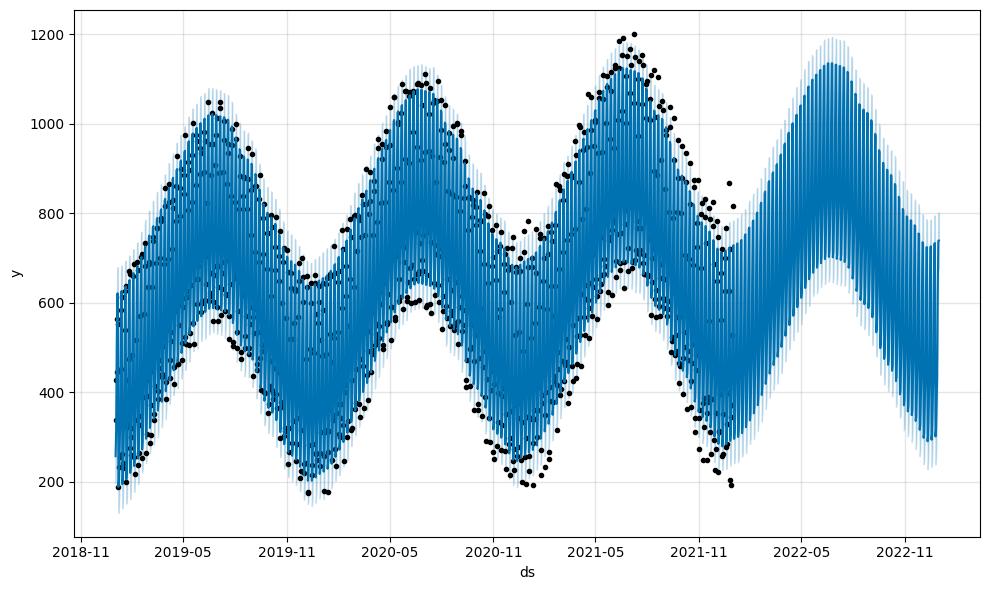

In [10]:
fig1 = m.plot(forecast)

#### See what seasonality and trend were detected.

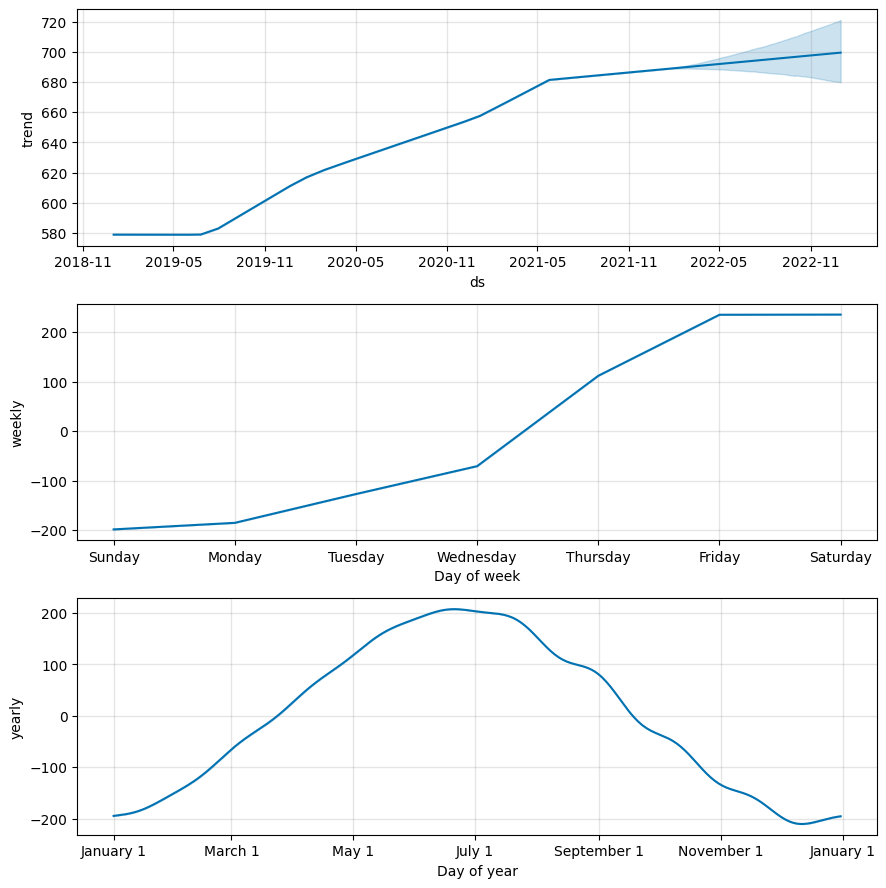

In [11]:
fig2 = m.plot_components(forecast)

### Use Plotly to generate an interactive plot.

In [12]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m, forecast)